In [45]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [46]:
import pandas as pd

diabetes_df = pd.read_csv (r'D:\AI python\Diabetes dataset\diabetes.csv', sep = ',')

In [47]:
column_names = diabetes_df.columns
for column in column_names:
    print(column + ' - ' + str(diabetes_df[column].isnull().sum()))

Pregnancies - 0
Glucose - 0
BloodPressure - 0
SkinThickness - 0
Insulin - 0
BMI - 0
DiabetesPedigreeFunction - 0
Age - 0
Outcome - 0


In [48]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
input

x = diabetes_df["Insulin"]
y = diabetes_df["Glucose"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 30)

In [50]:
x = diabetes_df["Insulin"].values.reshape(-1, 1)
y = diabetes_df["Glucose"].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 30)

tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   
y_pred = tree.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.0


In [51]:
x = diabetes_df[["Insulin"]]
y = diabetes_df["Glucose"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 30)

model = LinearRegression()   
model.fit(x_train,y_train)  
predicted = model.predict(x_test) 


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 887.1863505460861
R squared 0.13618899587569078


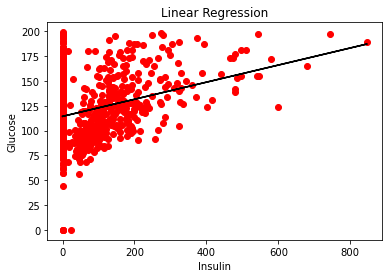

In [52]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Glucose")
plt.xlabel("Insulin")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [53]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline

Input=[('polynomial',PolynomialFeatures(degree=2)),('diabetes_df',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(x,y)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('diabetes_df', LinearRegression())])

In [54]:
poly_pred = pipe.predict(x_test)

print("MSE", mean_squared_error(y_test,poly_pred))
print("R squared", metrics.r2_score(y_test,poly_pred))

MSE 883.7489480485574
R squared 0.1395358306203215


In [55]:
poly_pred

array([114.4293769 , 126.36183918, 114.4293769 , 114.4293769 ,
       114.4293769 , 118.08456283, 114.4293769 , 114.4293769 ,
       130.42177886, 120.84421972, 123.20728264, 119.18273763,
       114.4293769 , 128.27058144, 114.4293769 , 122.88571388,
       128.27058144, 120.15721709, 130.97081732, 114.4293769 ,
       120.92117774, 114.4293769 , 114.4293769 , 114.4293769 ,
       114.4293769 , 124.84509736, 114.4293769 , 114.4293769 ,
       114.4293769 , 114.4293769 , 122.80563389, 124.84509736,
       129.51670508, 120.84421972, 114.4293769 , 138.82284718,
       114.4293769 , 114.4293769 , 114.4293769 , 118.30194997,
       125.51420968, 119.10865183, 114.4293769 , 114.4293769 ,
       114.4293769 , 126.1062391 , 114.4293769 , 114.4293769 ,
       114.4293769 , 114.4293769 , 114.4293769 , 114.4293769 ,
       114.4293769 , 114.4293769 , 114.4293769 , 122.01170231,
       114.4293769 , 122.56614319, 120.61409494, 114.4293769 ,
       114.4293769 , 118.30194997, 132.92785507, 114.42

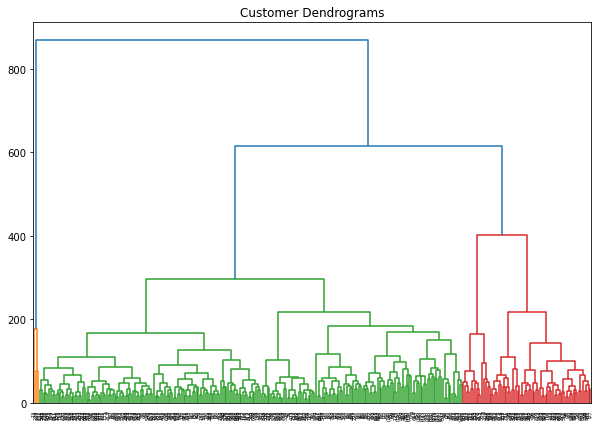

In [58]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(diabetes_df, method="complete"),10,  "level")